In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as pyplot

import geopandas

import copy

In [2]:
pts = geopandas.read_file("bus_stops.shp")

In [3]:
pts

,full_id,osm_id,osm_type,highway,name,shelter,name_en,ref,geometry
0,n729613537,729613537,node,bus_stop,Bus Stop 6910,None,None,None,POINT (174.7787019 -41.2929918)
1,n1010238204,1010238204,node,bus_stop,5000,yes,None,None,POINT (174.78246 -41.293858)
2,n1010239992,1010239992,node,bus_stop,None,yes,None,None,POINT (174.7849295 -41.2921881)
3,n1010242406,1010242406,node,bus_stop,5516,yes,None,None,POINT (174.7826853 -41.293737)
4,n1010242745,1010242745,node,bus_stop,None,yes,None,None,POINT (174.7772012 -41.295185)
5,n1010243515,1010243515,node,bus_stop,None,no,None,None,POINT (174.785895 -41.292382)
6,n1010243810,1010243810,node,bus_stop,Bus Stop 5002,yes,None,None,POINT (174.780062 -41.2931699)
7,n1010245188,1010245188,node,bus_stop,None,yes,5514,None,POINT (174.7799638 -41.2929283)
8,n1010245728,1010245728,node,bus_stop,None,None,None,None,POINT (174.7781658 -41.2933635)
9,n1010245981,1010245981,node,bus_stop,None,yes,None,6513,POINT (174.7870071 -41.2916415)


In [4]:
lines = geopandas.read_file("streets.shp")
bldgs = geopandas.read_file("buildings.shp")

In [9]:
pts.head()

,full_id,osm_id,osm_type,highway,name,shelter,name_en,ref,geometry
0,n729613537,729613537,node,bus_stop,Bus Stop 6910,None,None,None,POINT (174.7787019 -41.2929918)
1,n1010238204,1010238204,node,bus_stop,5000,yes,None,None,POINT (174.78246 -41.293858)
2,n1010239992,1010239992,node,bus_stop,None,yes,None,None,POINT (174.7849295 -41.2921881)
3,n1010242406,1010242406,node,bus_stop,5516,yes,None,None,POINT (174.7826853 -41.293737)
4,n1010242745,1010242745,node,bus_stop,None,yes,None,None,POINT (174.7772012 -41.295185)


In [10]:
lines.head()

,full_id,osm_id,osm_type,highway,name,source_nam,surface,cycleway_b,maxspeed,sidewalk,...,footway,crossing,descriptio,fee,destinat_6,width,horse,maxheight,covered,geometry
0,w5181907,5181907,way,unclassified,Taranaki Street,knowledge,asphalt,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (174.7803358 -41.2899742, 174.78027..."
1,w5181912,5181912,way,residential,Buller Street,knowledge,asphalt,no,50,both,...,None,None,None,None,None,None,None,None,None,"LINESTRING (174.769739 -41.2931242, 174.770343..."
2,w5181919,5181919,way,tertiary,Manners Street,local knowledge,asphalt,None,30,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (174.7788891 -41.2924322, 174.77873..."
3,w5181936,5181936,way,service,None,knowledge,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (174.7730693 -41.2899229, 174.77286..."
4,w5181942,5181942,way,residential,Dixon Street,local knowledge,asphalt,None,50,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (174.7714464 -41.2901131, 174.77214..."


In [11]:
bldgs.head()

,full_id,osm_id,osm_type,addr_house,addr_stree,building,building_l,descriptio,internet_a,name,...,toilets_di,name_en,smoking,location,power,substation,voltage,craft,healthcare,geometry
0,w26509771,26509771,way,279,Wakefield Street,yes,2,Supermarket,wlan,New World,...,None,None,None,None,None,None,None,None,None,"POLYGON ((174.784621 -41.2929667, 174.7845192 ..."
1,w131469593,131469593,way,None,None,yes,12,None,None,Hope Gibbons Buildihng,...,None,None,None,None,None,None,None,None,None,"POLYGON ((174.7783209 -41.2927298, 174.778143 ..."
2,w168665961,168665961,way,None,Corner of Tory Street & College Street,yes,None,None,None,Moore Wilson's,...,None,None,None,None,None,None,None,None,None,"POLYGON ((174.781468 -41.2956491, 174.7812778 ..."
3,w190554680,190554680,way,None,None,commercial,None,None,None,NEC House,...,None,None,None,None,None,None,None,None,None,"POLYGON ((174.7786082 -41.2919343, 174.7784445..."
4,w190554681,190554681,way,None,None,yes,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((174.7784713 -41.2920663, 174.7782651..."


AttributeError: 'Voronoi' object has no attribute 'plot'

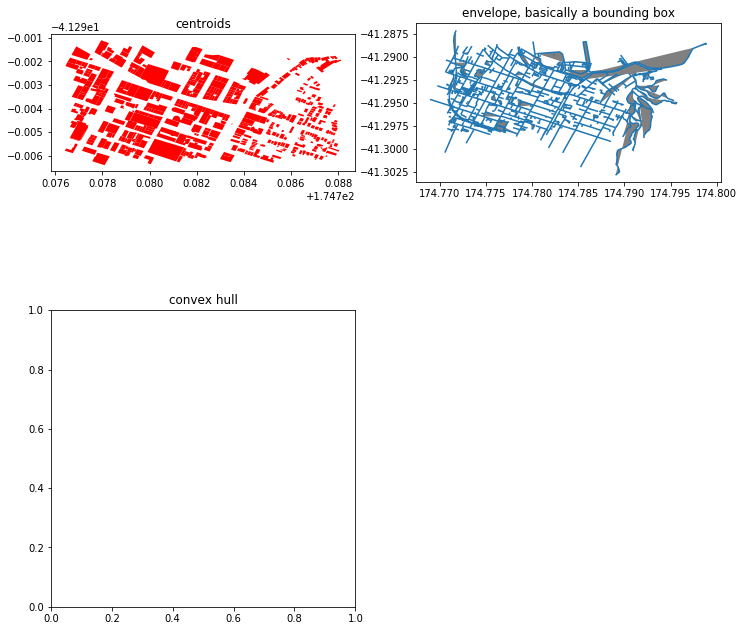

In [54]:
fig = pyplot.figure(figsize=(12,12))

ax1 = fig.add_subplot(221)
ax1.set_title("centroids")
bldgs.plot(ax=ax1, facecolor='Red')

ax2 = fig.add_subplot(222)
ax2.set_title("envelope, basically a bounding box")
lines.plot(ax=ax2, facecolor='grey')

ax3 = fig.add_subplot(223)
ax3.set_title("convex hull")
vor.plot(ax=ax3, facecolor='grey')

In [21]:
pts.head()

,full_id,osm_id,osm_type,highway,name,shelter,name_en,ref,geometry
0,n729613537,729613537,node,bus_stop,Bus Stop 6910,None,None,None,POINT (174.7787019 -41.2929918)
1,n1010238204,1010238204,node,bus_stop,5000,yes,None,None,POINT (174.78246 -41.293858)
2,n1010239992,1010239992,node,bus_stop,None,yes,None,None,POINT (174.7849295 -41.2921881)
3,n1010242406,1010242406,node,bus_stop,5516,yes,None,None,POINT (174.7826853 -41.293737)
4,n1010242745,1010242745,node,bus_stop,None,yes,None,None,POINT (174.7772012 -41.295185)


In [22]:
import pandas as pd
import numpy as np

    

In [25]:
cord = pts[['geometry']]

In [42]:
df = pd.DataFrame(pts, columns = ['geometry'])
df
type(pts)

geopandas.geodataframe.GeoDataFrame

In [40]:
for i in range(0,len(pts)):
    pts.loc[i,'centroid_lon'] = pts.geometry.centroid.x.iloc[i]
    pts.loc[i,'centroid_lat'] = pts.geometry.centroid.y.iloc[i]

In [41]:
pts.head()

,full_id,osm_id,osm_type,highway,name,shelter,name_en,ref,geometry,centroid_lon,centroid_lat
0,n729613537,729613537,node,bus_stop,Bus Stop 6910,None,None,None,POINT (174.7787019 -41.2929918),174.778702,-41.292992
1,n1010238204,1010238204,node,bus_stop,5000,yes,None,None,POINT (174.78246 -41.293858),174.782460,-41.293858
2,n1010239992,1010239992,node,bus_stop,None,yes,None,None,POINT (174.7849295 -41.2921881),174.784930,-41.292188
3,n1010242406,1010242406,node,bus_stop,5516,yes,None,None,POINT (174.7826853 -41.293737),174.782685,-41.293737
4,n1010242745,1010242745,node,bus_stop,None,yes,None,None,POINT (174.7772012 -41.295185),174.777201,-41.295185


In [43]:
import scipy.spatial as spatial

In [46]:
bus = np.array([[pts['centroid_lon'][k], pts['centroid_lat'][k]] for k in range(len(pts))])

In [48]:
vor = Voronoi(bus)

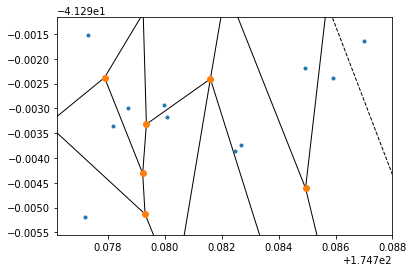

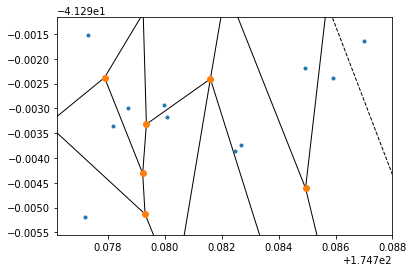

In [55]:
voronoi_plot_2d(vor)

In [57]:
vor

In [58]:
def voronoi_finite_polygons_2d(vor, radius=None):
    """Reconstruct infinite Voronoi regions in a
    2D diagram to finite regions.
    Source:
    [https://stackoverflow.com/a/20678647/1595060](https://stackoverflow.com/a/20678647/1595060)
    """
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")
    new_regions = []
    new_vertices = vor.vertices.tolist()
    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()
    # Construct a map containing all ridges for a
    # given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points,
                                  vor.ridge_vertices):
        all_ridges.setdefault(
            p1, []).append((p2, v1, v2))
        all_ridges.setdefault(
            p2, []).append((p1, v1, v2))
    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]
        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue
        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]
        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue
            # Compute the missing endpoint of an
            # infinite ridge
            t = vor.points[p2] - \
                vor.points[p1]  # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal
            midpoint = vor.points[[p1, p2]]. \
                mean(axis=0)
            direction = np.sign(
                np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + \
                direction * radius
            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())
        # Sort region counterclockwise.
        vs = np.asarray([new_vertices[v]
                         for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(
            vs[:, 1] - c[1], vs[:, 0] - c[0])
        new_region = np.array(new_region)[
            np.argsort(angles)]
        new_regions.append(new_region.tolist())
    return new_regions, np.asarray(new_vertices)

In [64]:
pip install smopy

  Stored in directory: C:\Users\blakeoliv\AppData\Local\pip\Cache\wheels\34\bc\cc\ca75e8ce1b5b30d02e010baca9d857877e80a5f471e8b4a550
Successfully built smopy
Note: you may need to restart the kernel to use updated packages.


In [67]:
import smopy
box = (pts['centroid_lat'].min(), pts['centroid_lon'].min(),
       pts['centroid_lat'].max(), pts['centroid_lon'].max())
m = smopy.Map(box, z=12)
regions, vertices = voronoi_finite_polygons_2d(vor)
cells = [m.to_pixels(vertices[region])
         for region in regions]

NameError: name 'Reds' is not defined

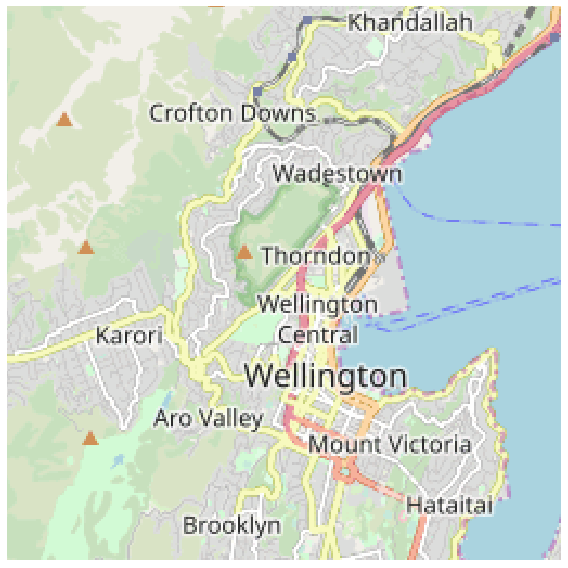

In [71]:
import matplotlib as mpl
ax = m.show_mpl(figsize=(12, 8))
ax.add_collection(
    mpl.collections.PolyCollection(
        cells, facecolors=Reds,
        edgecolors='k', alpha=.35))

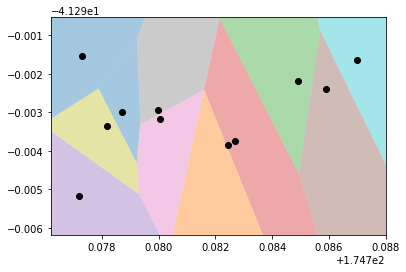

In [77]:
import matplotlib.pyplot as plt
regions, vertices = voronoi_finite_polygons_2d(vor)
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)
    
plt.plot(pts['centroid_lon'], pts['centroid_lat'], 'ko')
plt.xlim(vor.min_bound[0] - 0.001, vor.max_bound[0] + 0.001)
plt.ylim(vor.min_bound[1] - 0.001, vor.max_bound[1] + 0.001)

plt.show()